# Домашнее задание по теме: Классификация

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install pandas matplotlib numpy seaborn scikit-learn -y

## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод.

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Желательно писать свои идеи/мысли по поводу методов/результатов.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Обязательно **использовать `Pipeline`**.

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Импорт необходимых пакетов

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

## Загрузка данных

[Patient Treatment Classification](https://www.kaggle.com/saurabhshahane/patient-treatment-classification?select=data-ori.csv)

In [4]:
df = pd.read_csv('../../data/data-ori.csv')

df

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  \
0            35.1          11.8         4.65        6.3          310  25.4   
1            43.5          14.8         5.39       12.7          334  27.5   
2            33.5          11.3         4.74       13.2          305  23.8   
3            39.1          13.7         4.98       10.5          366  27.5   
4            30.9           9.9         4.23       22.1          333  23.4   
...           ...           ...          ...        ...          ...   ...   
4407         32.8          10.4         3.49        8.1           72  29.8   
4408         33.7          10.8         3.67        6.7           70  29.4   
4409         33.2          11.2         3.47        7.2          235  32.3   
4410         31.5          10.4         3.15        9.1          187  33.0   
4411         33.5          10.9         3.44        5.8          275  31.7   

      MCHC    MCV  AGE SEX SOURCE  
0     33.6   75.5    1   F    out  
1     34.0   80.7    1   F    out  
2     33.7   70.7    1   F    out  
3     35.0   78.5    1   F    out  
4     32.0   73.0    1   M    out  
...    ...    ...  ...  ..    ...  
4407  31.7   94.0   92   F     in  
4408  32.0   91.8   92   F     in  
4409  33.7   95.7   93   F    out  
4410  33.0  100.0   98   F     in  
4411  32.5   97.4   99   F    out  

[4412 rows x 11 columns]

## Преобразование типов

Привести в порядок типы данных. В результате не должно быть типа `object`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


In [6]:
df['SEX'] = df.SEX.astype('category')
df['SOURCE'] = df.SOURCE.astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HAEMATOCRIT   4412 non-null   float64 
 1   HAEMOGLOBINS  4412 non-null   float64 
 2   ERYTHROCYTE   4412 non-null   float64 
 3   LEUCOCYTE     4412 non-null   float64 
 4   THROMBOCYTE   4412 non-null   int64   
 5   MCH           4412 non-null   float64 
 6   MCHC          4412 non-null   float64 
 7   MCV           4412 non-null   float64 
 8   AGE           4412 non-null   int64   
 9   SEX           4412 non-null   category
 10  SOURCE        4412 non-null   category
dtypes: category(2), float64(7), int64(2)
memory usage: 319.2 KB


## Разделить на train/test

- Разделить данные на `y` и `X`.
- `y` - это колонка `gender`.
- Разделить данные на train / test.
- **В дальнейшем при анализе использовать строго `train` данные и не подсматривать в `test`.**

In [8]:
target_col = 'SOURCE'
y = df[target_col].copy()
X = df.drop(target_col, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Баланс классов

- Проверить классы `y` на сбалансированность.

<AxesSubplot:xlabel='SOURCE', ylabel='count'>

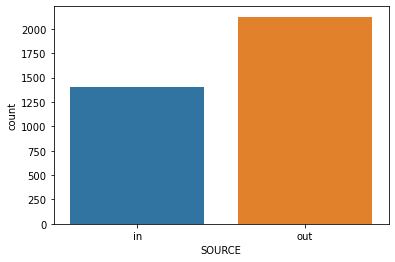

In [9]:
sns.countplot(x=y_train)

## Выбросы

- Есть ли выбросы? Каково распределение данных?
    - `hist`
    - `kde`
    - `boxplot`
- Нужно ли с этим что-то делать?

In [10]:
df_train = X_train.join(y_train)

df_num_cols = df_train.select_dtypes(include=np.number)
df_num_cols_len = len(df_num_cols.columns)

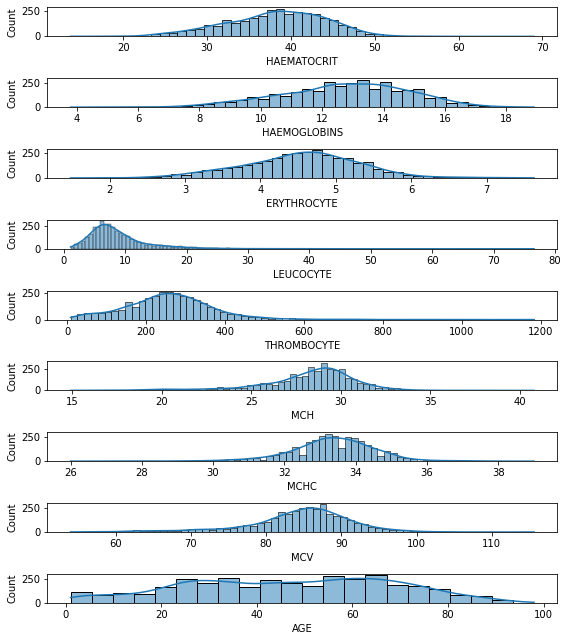

In [11]:
fig, axs = plt.subplots(df_num_cols_len, 1, figsize=(8, 9))

for index, num_col in enumerate(df_num_cols):
    sns.histplot(data=df_train[num_col], 
                 kde=True, 
                 ax=axs[index])
fig.tight_layout()

## Анализ корреляций

- Проверить нет ли мультиколлинеарности.
- Если есть, то нужно ли что-то с этим делать?

Подсказка: в `sns.heatmap` можно указать параметры `vmin`, `vmax` для более адекватного распределения цвета.

Text(0.5, 1.0, 'Correlation Matrix of features')

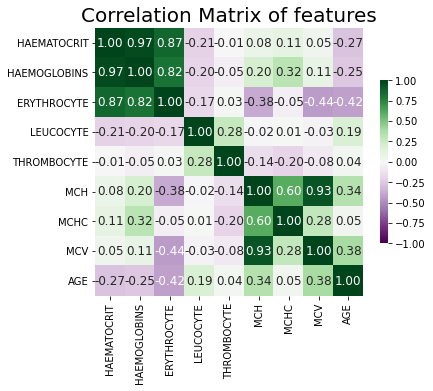

In [12]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(6, 6))

ax = sns.heatmap(
    correlation_matrix,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='PRGn',
    cbar_kws={"shrink": .5},
    annot_kws={"size": 12},
    robust=True,
    vmin=-1, 
    vmax=1
)

plt.title('Correlation Matrix of features', fontsize=20)

## Эксперименты с моделями

- Можно использовать любое количество признаков.
- Если необходимо, то использовать методы feature engineering.
- Помнить о том, что может быть полезна нормализация/стандартизация.
- Провести эксперименты на всех изученных моделях.
    - Попробовать разные модели.
    - Попробовать различные параметры `scoring` для `GridSearch`.
    - Результаты экспериментов желательно собрать в одну таблицу и по возможности визуализировать (`heatmap`, `confusion_matrix`).
- Проанализировать результаты (различные метрики). Написать выводы.

In [13]:
y_train

513     out
217      in
1454    out
1749    out
2520     in
       ... 
265      in
101     out
3225    out
281      in
1130    out
Name: SOURCE, Length: 3529, dtype: category
Categories (2, object): ['in', 'out']

In [14]:
y_train_enc = LabelEncoder().fit_transform(y_train)
y_test_enc = LabelEncoder().fit_transform(y_test)

In [15]:
df.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [16]:
num_cols = ['HAEMATOCRIT', 
            'HAEMOGLOBINS', 
            'ERYTHROCYTE', 
            'LEUCOCYTE',            
            'THROMBOCYTE', 
            'MCH', 
            'MCHC', 
            'MCV', 
            'AGE']

bin_cols = ['SEX']

num_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

bin_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_transformer', num_transformer, num_cols),
        ('bin_transformer', bin_transformer, bin_cols)
])

In [17]:
gs_scoring = ['roc_auc', 
              'recall', 
              'precision', 
              'f1', 
              'balanced_accuracy', 
              'accuracy']

In [18]:
models = {
    'DecisionTreeClassifier': (DecisionTreeClassifier, 
                               {'model__max_depth': [5, 7],
                                'model__criterion': ['gini', 'entropy']}),
    
    'LogisticRegression': (LogisticRegression, 
                           {'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}),
    
    'SVC': (SVC, 
            {'model__degree': [2, 3, 4]}),
    
    'KNeighborsClassifier': (KNeighborsClassifier, 
                             {'model__n_neighbors': [4, 5, 6], 
                              'model__weights': ['uniform', 'distance']})
}

In [19]:
import time

total = len(models) * len(gs_scoring)
index = 1
experiments = {}

for name, (model, param_grid) in models.items():
    experiments[name] = {}
    for scoring in gs_scoring:
        start = time.time()
        pipeline = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('model', model())
        ])
        
        print(f"{name} | {scoring} ...", end=' ')
        
        model_gs = GridSearchCV(pipeline, param_grid, n_jobs=-1, scoring=scoring)
        model_gs.fit(X_train, y_train_enc)
        
        experiments[name].update({scoring: model_gs})
        end = time.time()

        print(f"finished! ({end - start:0.2f}s) {index}/{total}")
        
        print(f"best_params: {model_gs.best_params_}")
        print(f"best_score: {model_gs.best_score_:0.2f}\n")
        
        index += 1
    print('-' * 20, '\n')

DecisionTreeClassifier | roc_auc ... finished! (2.28s) 1/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 5}
best_score: 0.77

DecisionTreeClassifier | recall ... finished! (0.26s) 2/24
best_params: {'model__criterion': 'gini', 'model__max_depth': 5}
best_score: 0.85

DecisionTreeClassifier | precision ... finished! (0.27s) 3/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 7}
best_score: 0.76

DecisionTreeClassifier | f1 ... finished! (0.28s) 4/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 7}
best_score: 0.80

DecisionTreeClassifier | balanced_accuracy ... finished! (0.31s) 5/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 7}
best_score: 0.72

DecisionTreeClassifier | accuracy ... finished! (0.25s) 6/24
best_params: {'model__criterion': 'entropy', 'model__max_depth': 7}
best_score: 0.74

-------------------- 

LogisticRegression | roc_auc ... 

/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


finished! (0.67s) 7/24
best_params: {'model__solver': 'sag'}
best_score: 0.77

LogisticRegression | recall ... 

/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


finished! (0.67s) 8/24
best_params: {'model__solver': 'saga'}
best_score: 0.87

LogisticRegression | precision ... finished! (0.54s) 9/24
best_params: {'model__solver': 'newton-cg'}
best_score: 0.73

LogisticRegression | f1 ... 

/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


finished! (0.76s) 10/24
best_params: {'model__solver': 'saga'}
best_score: 0.79

LogisticRegression | balanced_accuracy ... 

/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


finished! (0.66s) 11/24
best_params: {'model__solver': 'saga'}
best_score: 0.69

LogisticRegression | accuracy ... 

/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


finished! (0.62s) 12/24
best_params: {'model__solver': 'saga'}
best_score: 0.72

-------------------- 

SVC | roc_auc ... finished! (2.46s) 13/24
best_params: {'model__degree': 2}
best_score: 0.80

SVC | recall ... finished! (2.38s) 14/24
best_params: {'model__degree': 2}
best_score: 0.88

SVC | precision ... finished! (2.38s) 15/24
best_params: {'model__degree': 2}
best_score: 0.75

SVC | f1 ... finished! (2.45s) 16/24
best_params: {'model__degree': 2}
best_score: 0.81

SVC | balanced_accuracy ... finished! (2.59s) 17/24
best_params: {'model__degree': 2}
best_score: 0.72

SVC | accuracy ... finished! (2.48s) 18/24
best_params: {'model__degree': 2}
best_score: 0.76

-------------------- 

KNeighborsClassifier | roc_auc ... finished! (0.44s) 19/24
best_params: {'model__n_neighbors': 6, 'model__weights': 'distance'}
best_score: 0.77

KNeighborsClassifier | recall ... finished! (0.71s) 20/24
best_params: {'model__n_neighbors': 6, 'model__weights': 'distance'}
best_score: 0.81

KNeighborsC

## Анализ результатов

In [20]:
columns = ['accuracy', 'b_accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [21]:
def evaluate_model(y_predicted, X_test, y_test):       
    accuracy = accuracy_score(y_test, y_predicted)
    balanced_accuracy = balanced_accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted)
    recall = recall_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted, average='weighted')
    roc_auc = roc_auc_score(y_test, y_predicted)
    
    return pd.Series([accuracy, balanced_accuracy, precision, recall, f1, roc_auc], 
                     index=columns)



plot matrix: 6x4


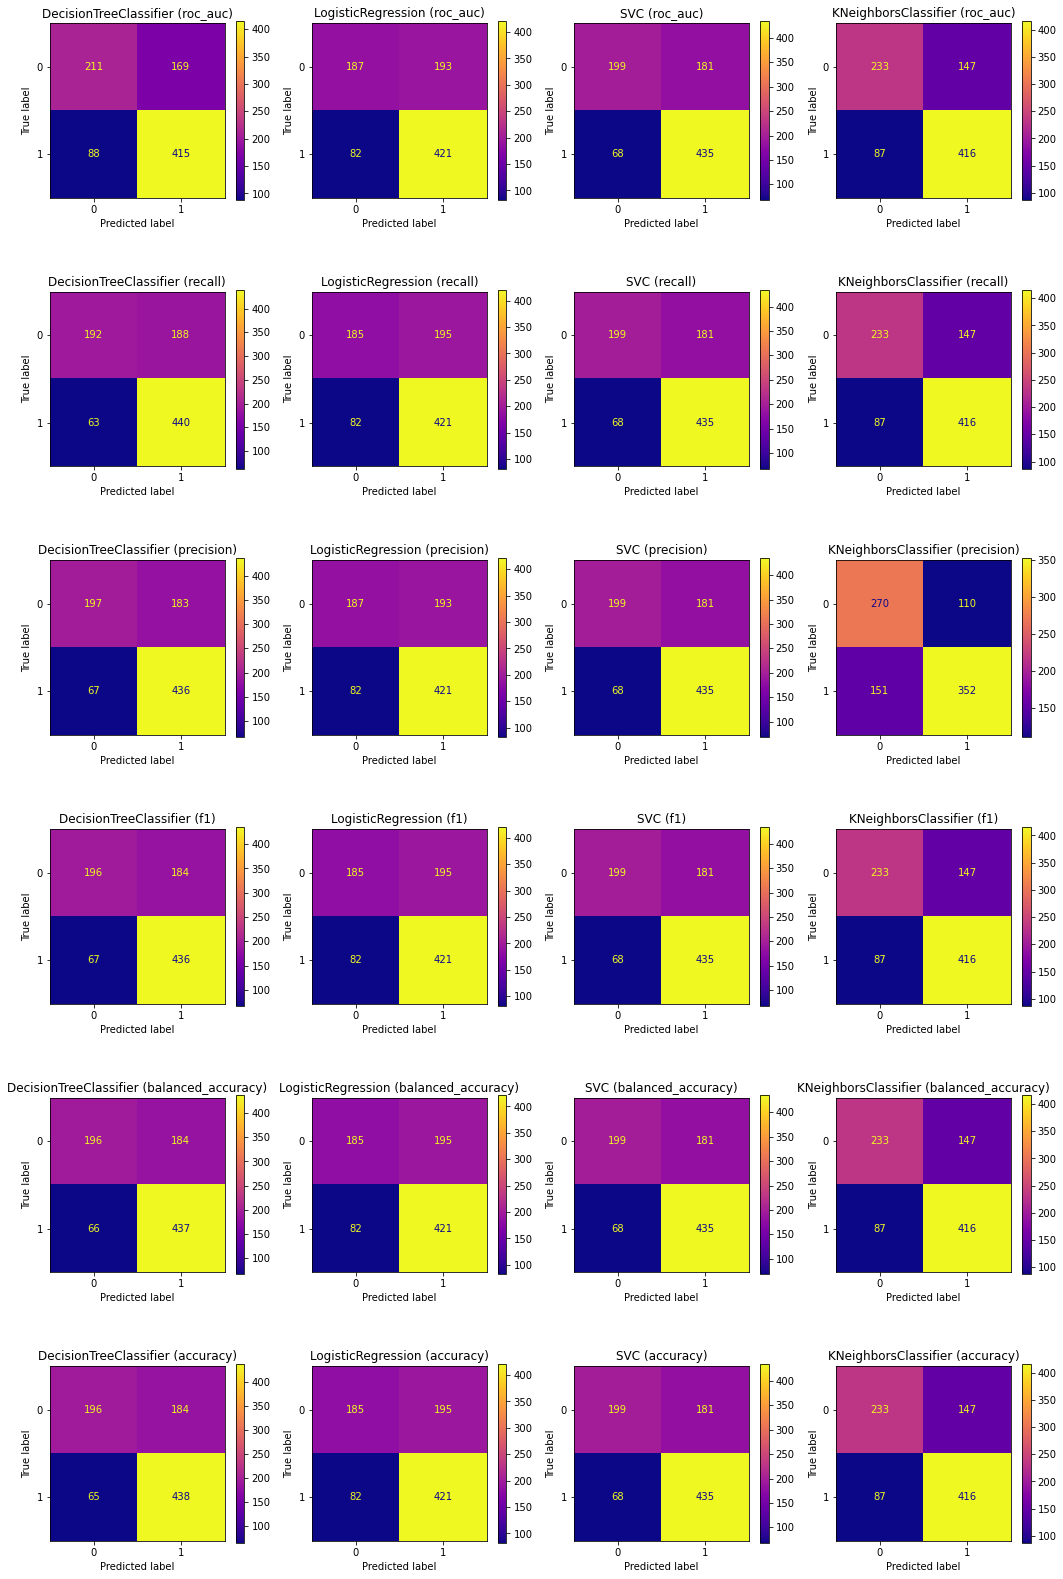

In [22]:
eval_df = pd.DataFrame(columns=columns)
name_scorer_index = []

names_len = len(models)
scorers_len = len(gs_scoring)
fig, axes = plt.subplots(scorers_len, names_len, figsize=(scorers_len*3, names_len*7))

for name_index, (name, models_by_scorer) in enumerate(experiments.items()):
    for scorer_index, (scorer, model) in enumerate(models_by_scorer.items()):
        name_scorer_index.append((name, scorer))

        y_predicted = model.predict(X_test)
        ax=axes[scorer_index][name_index]
        plot_confusion_matrix(model, X_test, y_test_enc, ax=ax, cmap='plasma')
        ax.set_title(f'{name} ({scorer})')
        
        eval_res = evaluate_model(y_predicted, X_test, y_test_enc)        
        eval_df = eval_df.append(eval_res, ignore_index=True)
        
index = pd.MultiIndex.from_tuples(name_scorer_index, names=["name", "scorer"])
eval_df.set_index(index, inplace=True)

print(f'\n\nplot matrix: {scorers_len}x{names_len}')

# расстояние между графиками по горизонтали и вертикали
fig.subplots_adjust(hspace=0.5, wspace=0.2)

In [23]:
eval_df

accuracy  b_accuracy  precision  \
name                   scorer                                               
DecisionTreeClassifier roc_auc            0.708947    0.690156   0.710616   
                       recall             0.715742    0.690007   0.700637   
                       precision          0.716874    0.692610   0.704362   
                       f1                 0.715742    0.691294   0.703226   
                       balanced_accuracy  0.716874    0.692288   0.703704   
                       accuracy           0.718007    0.693282   0.704180   
LogisticRegression     roc_auc            0.688562    0.664542   0.685668   
                       recall             0.686297    0.661910   0.683442   
                       precision          0.688562    0.664542   0.685668   
                       f1                 0.686297    0.661910   0.683442   
                       balanced_accuracy  0.686297    0.661910   0.683442   
                       accuracy           0.686297    0.661910   0.683442   
SVC                    roc_auc            0.718007    0.694248   0.706169   
                       recall             0.718007    0.694248   0.706169   
                       precision          0.718007    0.694248   0.706169   
                       f1                 0.718007    0.694248   0.706169   
                       balanced_accuracy  0.718007    0.694248   0.706169   
                       accuracy           0.718007    0.694248   0.706169   
KNeighborsClassifier   roc_auc            0.734994    0.720098   0.738899   
                       recall             0.734994    0.720098   0.738899   
                       precision          0.704417    0.705164   0.761905   
                       f1                 0.734994    0.720098   0.738899   
                       balanced_accuracy  0.734994    0.720098   0.738899   
                       accuracy           0.734994    0.720098   0.738899   

                                            recall        f1   roc_auc  
name                   scorer                                           
DecisionTreeClassifier roc_auc            0.825050  0.702431  0.690156  
                       recall             0.874751  0.703472  0.690007  
                       precision          0.866799  0.706011  0.692610  
                       f1                 0.866799  0.704688  0.691294  
                       balanced_accuracy  0.868787  0.705717  0.692288  
                       accuracy           0.870775  0.706745  0.693282  
LogisticRegression     roc_auc            0.836978  0.677403  0.664542  
                       recall             0.836978  0.674742  0.661910  
                       precision          0.836978  0.677403  0.664542  
                       f1                 0.836978  0.674742  0.661910  
                       balanced_accuracy  0.836978  0.674742  0.661910  
                       accuracy           0.836978  0.674742  0.661910  
SVC                    roc_auc            0.864811  0.707620  0.694248  
                       recall             0.864811  0.707620  0.694248  
                       precision          0.864811  0.707620  0.694248  
                       f1                 0.864811  0.707620  0.694248  
                       balanced_accuracy  0.864811  0.707620  0.694248  
                       accuracy           0.864811  0.707620  0.694248  
KNeighborsClassifier   roc_auc            0.827038  0.731095  0.720098  
                       recall             0.827038  0.731095  0.720098  
                       precision          0.699801  0.705702  0.705164  
                       f1                 0.827038  0.731095  0.720098  
                       balanced_accuracy  0.827038  0.731095  0.720098  
                       accuracy           0.827038  0.731095  0.720098

In [24]:
min_val = eval_df.min().min()
max_val = eval_df.max().max()
min_val, max_val

(0.6619101182379408, 0.8747514910536779)

<AxesSubplot:ylabel='name-scorer'>

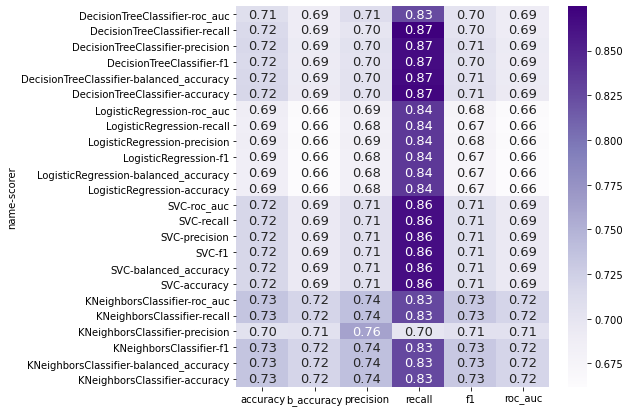

In [25]:
plt.figure(figsize=(7, 7))
sns.heatmap(eval_df, 
            annot=True, 
            annot_kws={"size": 13}, 
            fmt="1.2f", 
            cmap='Purples', 
            vmin=min_val, 
            vmax=max_val)

## Сохранение лучшей модели

In [26]:
import joblib

joblib.dump(experiments['DecisionTreeClassifier']['recall'], './tmp/example_model_dtc_recall.joblib')

['./tmp/example_model_dtc_recall.joblib']